In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy as sp
from sklearn import mixture


SCI-KIT LEARN

In [5]:
n_samples = 300
# generate random sample, two components
np.random.seed(0)
# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])
# generate zero centered stretched Gaussian data
C = np.array([[0., -0.7], [3.5, .7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)
# concatenate the two datasets into the final training set
X_train = np.vstack([shifted_gaussian, stretched_gaussian])


In [6]:
# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)


GaussianMixture(n_components=2)

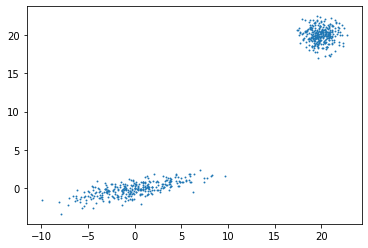

In [7]:
plt.scatter(X_train[:, 0], X_train[:, 1], .8)


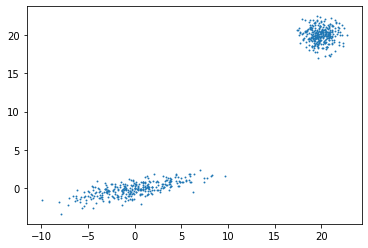

In [17]:
# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)
# plt.title('Negative log-likelihood predicted by a GMM')
# plt.axis('tight')
plt.show()


In [9]:
print("mean", clf.means_)
print("--------------")
print("sigma", clf.covariances_)


mean [[19.91453549 19.97556345]
 [-0.13607006 -0.07059606]]
--------------
sigma [[[1.02179964e+00 3.28158679e-03]
  [3.28158679e-03 9.90375215e-01]]

 [[1.13328040e+01 2.25048269e+00]
  [2.25048269e+00 8.77009968e-01]]]


In [10]:
class GMM(object):
    def __init__(self, X, k=2):
        # dimension
        X = np.asarray(X)
        self.m, self.n = X.shape
        self.data = X.copy()
        # number of mixtures
        self.k = k

    def _init(self):
        # init mixture means/sigmas
        self.mean_arr = np.asmatrix(np.random.random((self.k, self.n)))
        self.sigma_arr = np.array(
            [np.asmatrix(np.identity(self.n)) for i in range(self.k)])
        self.phi = np.ones(self.k)/self.k
        self.w = np.asmatrix(np.empty((self.m, self.k), dtype=float))
        #print(self.mean_arr)
        #print(self.sigma_arr)

    # def fit(self, delta=1e-4):
    #     self._init()
    #     num_iters = 0
    #     ll = 1
    #     previous_ll = 0
    #     while(ll-previous_ll > delta):
    #         previous_ll = self.loglikelihood()
    #         self._fit()
    #         num_iters += 1
    #         ll = self.loglikelihood()
    #         print('Iteration %d: log-likelihood is %.6f' % (num_iters, ll))
    #     print('Terminate at %d-th iteration:log-likelihood is %.6f' %
    #           (num_iters, ll))

    def fit(self):
        self._init()
        num_iters = 0
        ll = 1
        previous_ll = 0
        for i in range(10):
            previous_ll = self.loglikelihood()
            self._fit()
            num_iters += 1
            ll = self.loglikelihood()
            print('Iteration %d: log-likelihood is %.6f' % (num_iters, ll))
        print('Terminate at %d-th iteration:log-likelihood is %.6f' %
              (num_iters, ll))

    def loglikelihood(self):
        ll = 0
        for i in range(self.m):
            tmp = 0
            for j in range(self.k):
                #print(self.sigma_arr[j])
                tmp += sp.stats.multivariate_normal.pdf(self.data[i, :],
                                                        self.mean_arr[j, :].A1,
                                                        self.sigma_arr[j, :]) *self.phi[j]
            ll += np.log(tmp)
        return ll

    def _fit(self):
        self.e_step()
        self.m_step()

    def e_step(self):
        # calculate w_j^{(i)}
        for i in range(self.m):
            den = 0
            for j in range(self.k):
                num = sp.stats.multivariate_normal.pdf(self.data[i, :],
                                                       self.mean_arr[j].A1,
                                                       self.sigma_arr[j]) *self.phi[j]
                    
                den += num
                self.w[i, j] = num
            self.w[i, :] /= den
            # assert self.w[i, :].sum() - 1 < 1e-4

    def m_step(self):
        for j in range(self.k):
            const = self.w[:, j].sum()
            self.phi[j] = 1/self.m * const
            _mu_j = np.zeros(self.n)
            _sigma_j = np.zeros((self.n, self.n))
            for i in range(self.m):
                _mu_j += (self.data[i, :] * self.w[i, j])
                _sigma_j += self.w[i, j] * ((self.data[i, :] - self.mean_arr[j, :]).T * (
                    self.data[i, :] - self.mean_arr[j, :]))
                #print((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))
            self.mean_arr[j] = _mu_j / const
            self.sigma_arr[j] = _sigma_j / const
        #print(self.sigma_arr)


In [11]:
gmm = GMM(X_train)
gmm.fit()


Iteration 1: log-likelihood is -3247.181524
Iteration 2: log-likelihood is -2933.344486
Iteration 3: log-likelihood is -2719.683535
Iteration 4: log-likelihood is -2368.990678
Iteration 5: log-likelihood is -2357.993158
Iteration 6: log-likelihood is -2357.993158
Iteration 7: log-likelihood is -2357.993158
Iteration 8: log-likelihood is -2357.993158
Iteration 9: log-likelihood is -2357.993158
Iteration 10: log-likelihood is -2357.993158
Terminate at 10-th iteration:log-likelihood is -2357.993158


In [12]:
gmm.mean_arr


matrix([[19.91453549, 19.97556345],
        [-0.13607006, -0.07059606]])

In [13]:
gmm.sigma_arr


array([[[1.02179864e+00, 3.28158679e-03],
        [3.28158679e-03, 9.90374215e-01]],

       [[1.13328030e+01, 2.25048269e+00],
        [2.25048269e+00, 8.77008968e-01]]])

In [18]:
gmm.w

matrix([[1.00000000e+000, 1.02833792e-140],
        [1.00000000e+000, 5.49549483e-174],
        [1.00000000e+000, 8.76788247e-119],
        ...,
        [3.05149231e-145, 1.00000000e+000],
        [9.31579590e-194, 1.00000000e+000],
        [9.49220909e-139, 1.00000000e+000]])

In [14]:
gmm.phi

array([0.5, 0.5])